---
## Text mining on amazon reviews <br> <font size=3.4>Dataset:Tweets.txt<br>Perform sentimental analysis on the tweets extracted from the above
---

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas
tweets=pd.read_csv("../input/datatweet/Tweets.txt",error_bad_lines=False, sep=';')
tweets

,X
0,"234 tweets with ""loser"" I feel sorry for Rosi..."
1,"tweets with ""dumb"" or ""dummy"" You must admit t..."
2,"204 tweets with ""terrible"" I loved beating the..."
3,"183 tweets with ""stupid"" @michellemalkin You w..."
4,.
5,"156 tweets with ""weak"" There is no longer a Be..."
6,.
7,"117 tweets with ""dope"" or ""dopey"" Dopey @Lor..."
8,.
9,"115 tweets with ""dishonest"" A dishonest slob o..."


In [3]:
tweets = [X.strip() for X in tweets.X] # remove both the leading and the trailing characters
tweets = [X for X in tweets if X] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['234 tweets with "loser"  I feel sorry for Rosie \'s new partner in love whose parents are devastated at the thought of their daughter being with @Rosie--a true loser. — Donald J. Trump (@realDonaldTrump) December 14, 2011 222.',
 'tweets with "dumb" or "dummy" You must admit that Bryant Gumbel is one of the dumbest racists around - an arrogant dope with no talent. Failed at CBS etc-why still on TV? — Donald J. Trump (@realDonaldTrump) August 21, 2013 .',
 '204 tweets with "terrible" I loved beating these two terrible human beings. I would never recommend that anyone use her lawyer, he is a total loser! — Donald J. Trump (@realDonaldTrump) May 23, 2013 .',
 '183 tweets with "stupid" @michellemalkin You were born stupid! — Donald J. Trump (@realDonaldTrump) March 22, 2013',
 '.',
 '156 tweets with "weak" There is no longer a Bernie Sanders "political revolution." He is turning out to be a weak and somewhat pathetic figure,wants it all to end! — Donald J. Trump (@realDonaldTrump) July 2

In [4]:
##Part Of Speech Tagging
nlp = spacy.load('en') 

one_block = tweets[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [5]:
for token in doc_block[0:20]:
    print(token, token.pos_)

37 NUM
tweets NOUN
with ADP
" PUNCT
disgusting VERB
" PUNCT
Barney PROPN
Frank PROPN
looked VERB
disgusting ADJ
-- PUNCT
nipples NOUN
protruding NOUN
-- PUNCT
in ADP
his DET
blue ADJ
shirt NOUN
before ADP
Congress PROPN


In [6]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['shirt']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,tweets,1
1,disgusting,1
2,looked,1
3,nipples,1
4,protruding,1
5,shirt,1


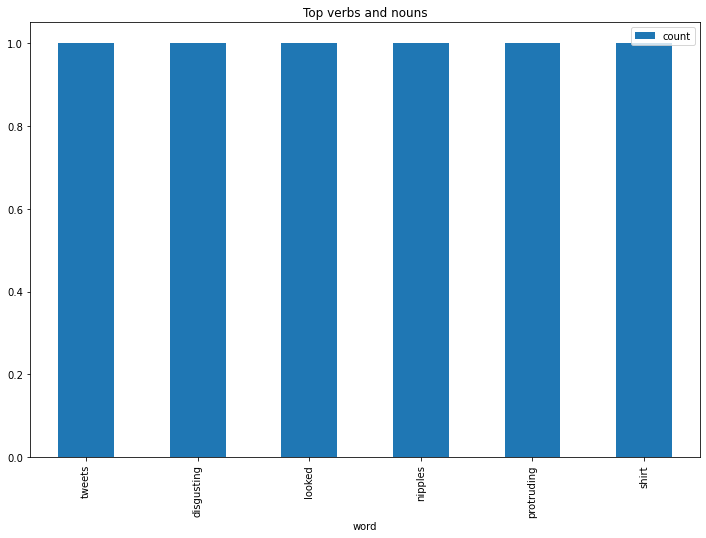

In [10]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

## Emotion Mining

In [11]:
#Sentiment analysis
afinn = pd.read_csv('../input/afinn-data/Afinn (3).csv' , sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [12]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [13]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [14]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [16]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences[5:15]

['I would never recommend that anyone use her lawyer, he is a total loser!',
 '— Donald J. Trump (@realDonaldTrump) May 23, 2013 .',
 '183 tweets with "stupid" @michellemalkin You were born stupid!',
 '— Donald J. Trump (@realDonaldTrump) March 22, 2013 .',
 '156 tweets with "weak" There is no longer a Bernie Sanders "political revolution."',
 'He is turning out to be a weak and somewhat pathetic figure,wants it all to end!',
 '— Donald J. Trump (@realDonaldTrump) July 24, 2016 .',
 '117 tweets with "dope" or "dopey" Dopey  @Lord_Sugar I\'m worth $8 billion and you\'re worth peanuts...without my show nobody would even know who you are.',
 '— Donald J. Trump (@realDonaldTrump) December 7, 2012 .',
 '115 tweets with "dishonest" A dishonest slob of a reporter, who doesn\'t understand my sarcasm when talking about him or his wife, wrote a foolish & boring Trump "hit" — Donald J. Trump (@realDonaldTrump) February 15, 2014 .']

In [17]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"234 tweets with ""loser"" I feel sorry for Rosi..."
1,— Donald J. Trump (@realDonaldTrump) December ...
2,Failed at CBS etc-why still on TV?
3,— Donald J. Trump (@realDonaldTrump) August 21...
4,"204 tweets with ""terrible"" I loved beating the..."
...,...
89,"I study cowards and stupid people ""@MrMarin88:..."
90,Only stupid people Pigs get slaughtered … again.
91,Ft Lauderdale plaintiffs must pay me close to ...
92,Many journalists are honest and great - but so...


In [18]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [19]:
# test that it works
calculate_sentiment(text = 'very sad')

-2

In [20]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [21]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    29
1    34
2     7
3     9
4    12
5    14
6     9
7     9
8     9
9    13
Name: word_count, dtype: int64

In [22]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
65,"31 tweets implying ""autism"" is caused by vacci...",2,30
66,"586 tweets with ""poll"" Even though every poll,...",2,25
73,"Retaliation It makes me feel so good to hit ""s...",3,22
25,Good night.,3,2
92,Many journalists are honest and great - but so...,3,15
24,I already know the winners.,4,5
59,Like the @nytimes story which has become a joke!,4,9
12,"117 tweets with ""dope"" or ""dopey"" Dopey @Lord...",4,25
51,"28 tweets with ""goofy"" When Mitt Romney asked ...",4,31
81,I am a very calm person but love tweeting abou...,7,15


In [23]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    94.00000
mean     -1.43617
std       3.71153
min     -15.00000
25%      -3.00000
50%       0.00000
75%       0.00000
max       7.00000
Name: sentiment_value, dtype: float64

In [24]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,"234 tweets with ""loser"" I feel sorry for Rosi...",-6,29
1,— Donald J. Trump (@realDonaldTrump) December ...,-13,34
2,Failed at CBS etc-why still on TV?,-2,7
3,— Donald J. Trump (@realDonaldTrump) August 21...,0,9
4,"204 tweets with ""terrible"" I loved beating the...",-3,12


In [28]:
sent_df[sent_df['sentiment_value']>=2].head()

,sentence,sentiment_value,word_count
12,"117 tweets with ""dope"" or ""dopey"" Dopey @Lord...",4,25
24,I already know the winners.,4,5
25,Good night.,3,2
41,"@FrankLuntz, your so-called ""focus groups"" are...",2,9
51,"28 tweets with ""goofy"" When Mitt Romney asked ...",4,31


In [29]:
sent_df['index']=range(0,len(sent_df))

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


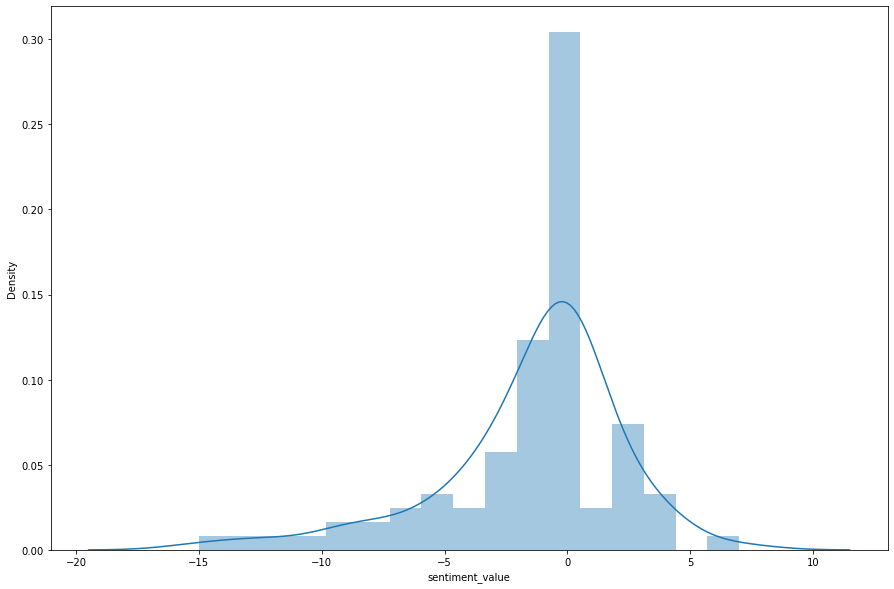

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.distplot(sent_df['sentiment_value']);

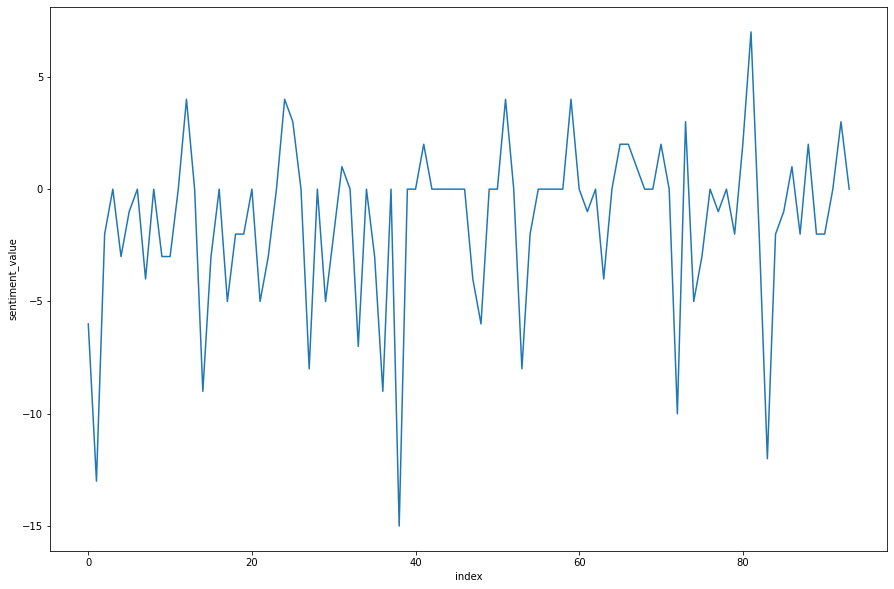

In [32]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

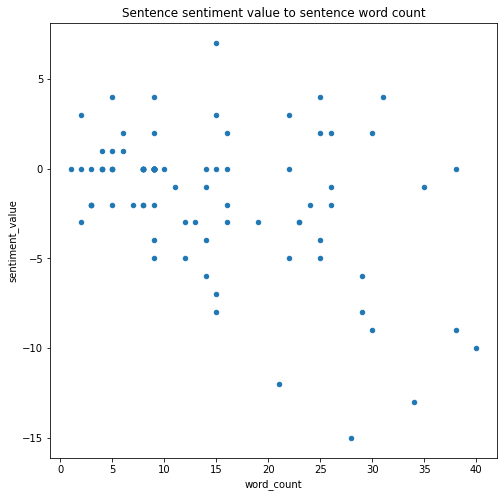

In [34]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');